In [90]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("winequality-red.csv")
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [91]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [92]:
df.duplicated().sum()

np.int64(240)

In [93]:
df = df.drop_duplicates()

df.duplicated().sum()

np.int64(0)

In [94]:
df.shape

(1359, 12)

In [95]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [97]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

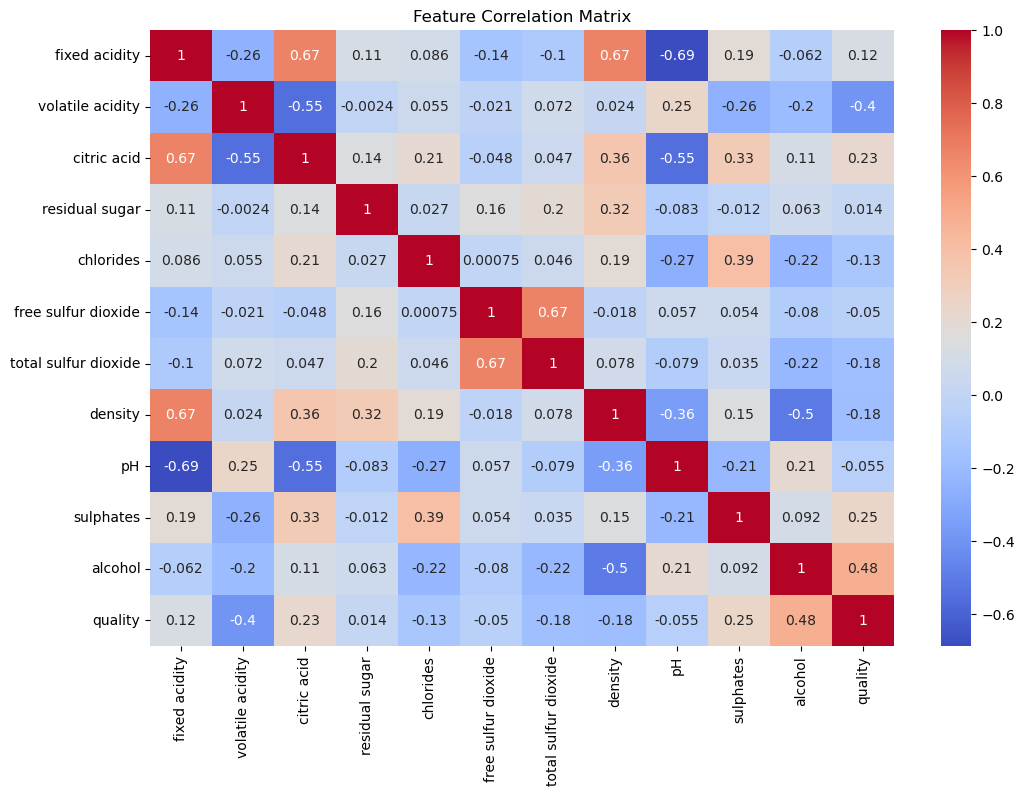

In [98]:

corr_matrix = df.corr()


plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [99]:
df.skew()

fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          4.548153
chlorides               5.502487
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
quality                 0.192407
dtype: float64

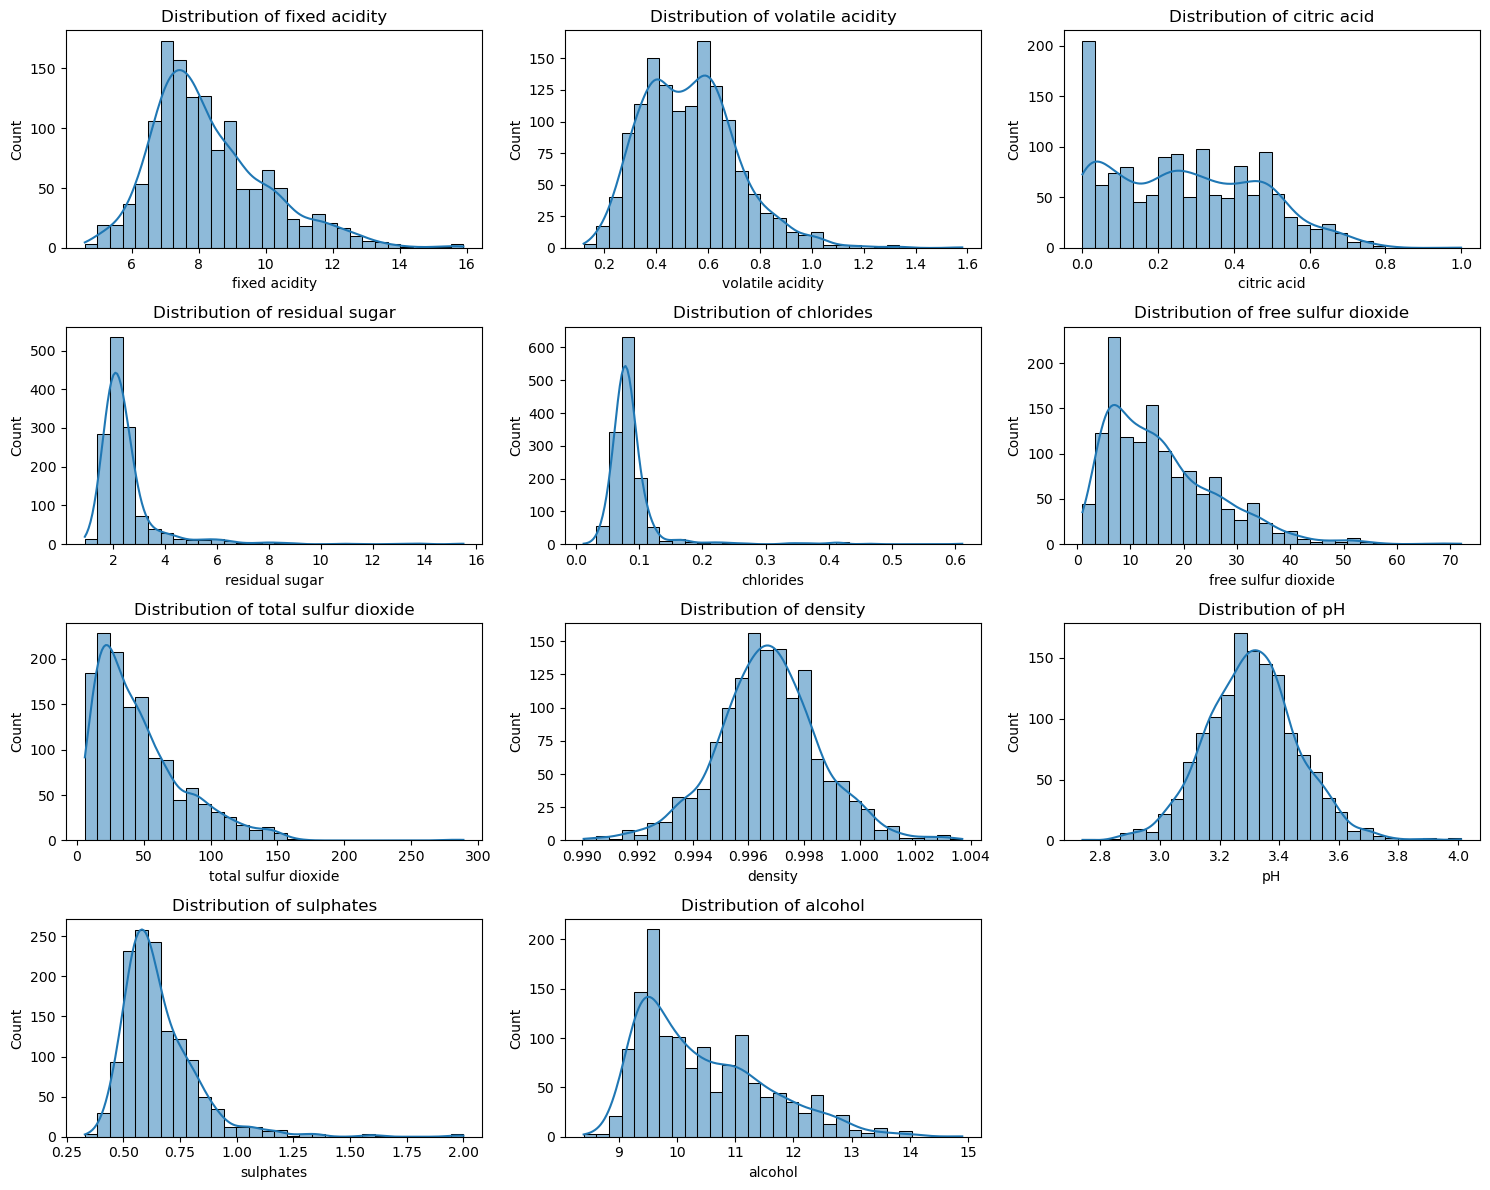

In [100]:

features = df.columns.drop('quality') 
plt.figure(figsize=(15,12))

for i, col in enumerate(features):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


In [101]:
print(df['quality'].value_counts())

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64


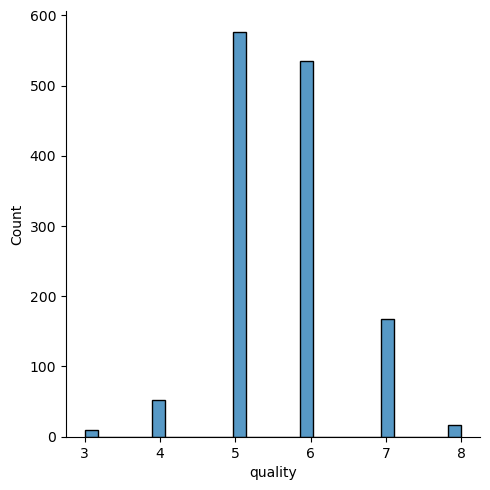

In [102]:
sns.displot(df['quality'])


In [103]:
import numpy as np
X = df.drop("quality", axis=1)
skewed_features = ['residual sugar', 'chlorides', 'sulphates', 
                   'free sulfur dioxide', 'total sulfur dioxide']

for col in skewed_features:
    X[col] = np.log1p(X[col])  


In [104]:
import numpy as np

X['chlorides'] = np.log10(X['chlorides'] + 1e-6) 


X['residual sugar'] = np.log10(X['residual sugar'])
X['sulphates'] = np.log10(X['sulphates'])
X['fixed acidity'] = np.log10(X['fixed acidity'])


In [105]:
X=pd.DataFrame(X)
X.skew()

fixed acidity           0.348804
volatile acidity        0.729279
citric acid             0.312726
residual sugar          1.243504
chlorides               1.700526
free sulfur dioxide    -0.090901
total sulfur dioxide   -0.035459
density                 0.044778
pH                      0.232032
sulphates               0.761608
alcohol                 0.859841
dtype: float64

In [106]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [107]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



X = df.drop("quality", axis=1)
y = df["quality"]




smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)


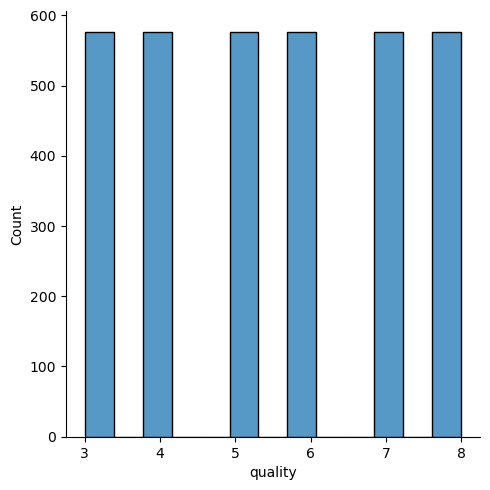

In [108]:
sns.displot(y_res)

In [109]:

y_cat = to_categorical(y_res - y_res.min())

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_cat, test_size=0.2, random_state=42, stratify=y_res
)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(y_cat)

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


In [110]:


classes = np.arange(y_cat.shape[1])
class_weights = compute_class_weight('balanced', classes=classes, y=np.argmax(y_train, axis=1))
class_weights = dict(zip(classes, class_weights))
classes

array([0, 1, 2, 3, 4, 5])

In [111]:

model = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(y_cat.shape[1], activation='softmax')
])


c:\Program Files\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [112]:

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=70,
    batch_size=32,
    verbose=1,
    class_weight=class_weights
)


loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}")

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)



Epoch 1/70
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3792 - loss: 1.5277 - val_accuracy: 0.5235 - val_loss: 1.1924
Epoch 2/70
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5305 - loss: 1.1145 - val_accuracy: 0.5758 - val_loss: 1.0130
Epoch 3/70
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5693 - loss: 1.0287 - val_accuracy: 0.6119 - val_loss: 0.9507
Epoch 4/70
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5937 - loss: 0.9741 - val_accuracy: 0.6390 - val_loss: 0.9018
Epoch 5/70
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6230 - loss: 0.9194 - val_accuracy: 0.6426 - val_loss: 0.8754
Epoch 6/70
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6312 - loss: 0.8898 - val_accuracy: 0.6661 - val_loss: 0.8388
Epoch 7/70
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6569 - loss: 0.8481 - val_accuracy: 0.6769 - val_loss: 0.8264
Epoch 8/70
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6555 - loss: 0.8464 - val_accuracy: 0.6895 - val_loss

Classification Report per class:

0: {'precision': 0.9829059829059829, 'recall': 1.0, 'f1-score': 0.9913793103448276, 'support': 115.0}
1: {'precision': 0.8188405797101449, 'recall': 0.9826086956521739, 'f1-score': 0.8932806324110671, 'support': 115.0}
2: {'precision': 0.7473684210526316, 'recall': 0.6120689655172413, 'f1-score': 0.6729857819905213, 'support': 116.0}
3: {'precision': 0.6138613861386139, 'recall': 0.5344827586206896, 'f1-score': 0.5714285714285714, 'support': 116.0}
4: {'precision': 0.7868852459016393, 'recall': 0.8275862068965517, 'f1-score': 0.8067226890756303, 'support': 116.0}
5: {'precision': 0.9583333333333334, 'recall': 1.0, 'f1-score': 0.9787234042553191, 'support': 115.0}
macro avg: {'precision': 0.8180324915070577, 'recall': 0.8261244377811093, 'f1-score': 0.8190867315843229, 'support': 693.0}
weighted avg: {'precision': 0.8175909584314035, 'recall': 0.8253968253968254, 'f1-score': 0.8185006952895778, 'support': 693.0}

Overall Accuracy: 0.8253968253968254

F1

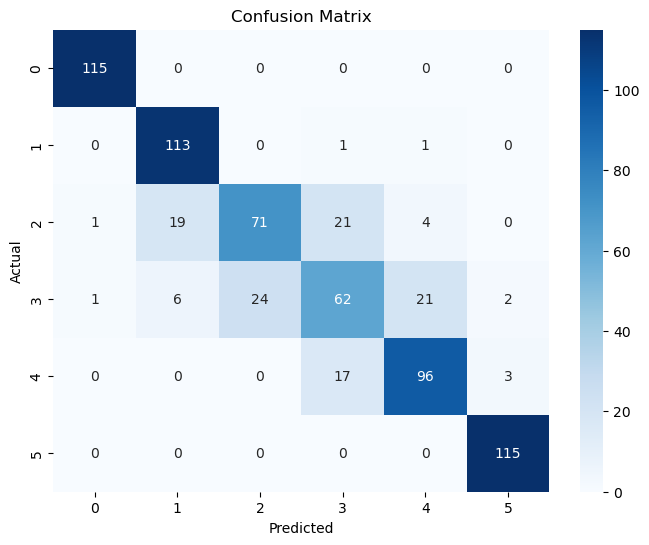

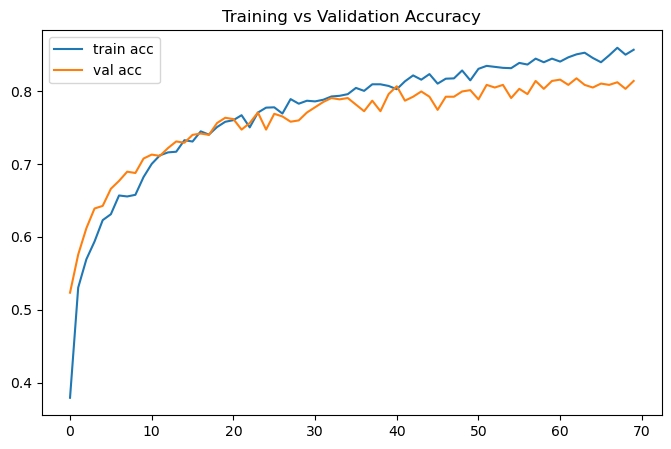

In [113]:

report = classification_report(y_true, y_pred_classes, digits=4, output_dict=True)
print("Classification Report per class:\n")
for key, value in report.items():
    if key not in ['accuracy']:
        print(f"{key}: {value}")
print("\nOverall Accuracy:", report['accuracy'])

macro_f1 = f1_score(y_true, y_pred_classes, average='macro')
weighted_f1 = f1_score(y_true, y_pred_classes, average='weighted')
micro_f1 = f1_score(y_true, y_pred_classes, average='micro')

macro_precision = precision_score(y_true, y_pred_classes, average='macro')
weighted_precision = precision_score(y_true, y_pred_classes, average='weighted')
micro_precision = precision_score(y_true, y_pred_classes, average='micro')

macro_recall = recall_score(y_true, y_pred_classes, average='macro')
weighted_recall = recall_score(y_true, y_pred_classes, average='weighted')
micro_recall = recall_score(y_true, y_pred_classes, average='micro')

print(f"\nF1-score -> Macro: {macro_f1:.4f}, Weighted: {weighted_f1:.4f}, Micro: {micro_f1:.4f}")
print(f"Precision -> Macro: {macro_precision:.4f}, Weighted: {weighted_precision:.4f}, Micro: {micro_precision:.4f}")
print(f"Recall    -> Macro: {macro_recall:.4f}, Weighted: {weighted_recall:.4f}, Micro: {micro_recall:.4f}")


cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()


In [114]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score


print("\nOverall Accuracy:", report['accuracy'])

macro_f1 = f1_score(y_true, y_pred_classes, average='macro')
weighted_f1 = f1_score(y_true, y_pred_classes, average='weighted')
micro_f1 = f1_score(y_true, y_pred_classes, average='micro')

print(f"\nMacro F1-score: {macro_f1:.4f}")
print(f"Weighted F1-score: {weighted_f1:.4f}")
print(f"Micro F1-score: {micro_f1:.4f}")


macro_precision = precision_score(y_true, y_pred_classes, average='macro')
weighted_precision = precision_score(y_true, y_pred_classes, average='weighted')
micro_precision = precision_score(y_true, y_pred_classes, average='micro')

macro_recall = recall_score(y_true, y_pred_classes, average='macro')
weighted_recall = recall_score(y_true, y_pred_classes, average='weighted')
micro_recall = recall_score(y_true, y_pred_classes, average='micro')

print(f"\nPrecision -> Macro: {macro_precision:.4f}, Weighted: {weighted_precision:.4f}, Micro: {micro_precision:.4f}")
print(f"Recall    -> Macro: {macro_recall:.4f}, Weighted: {weighted_recall:.4f}, Micro: {micro_recall:.4f}")



Overall Accuracy: 0.8253968253968254

Macro F1-score: 0.8191
Weighted F1-score: 0.8185
Micro F1-score: 0.8254

Precision -> Macro: 0.8180, Weighted: 0.8176, Micro: 0.8254
Recall    -> Macro: 0.8261, Weighted: 0.8254, Micro: 0.8254


In [115]:
import joblib
from tensorflow.keras.models import load_model

model.save("wine_ann_model.h5")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']